<a href="https://colab.research.google.com/github/PujithaReddyKethireddy/YOLO_MODEL/blob/main/YOLOV5s_MDD_PCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Sat Dec 20 13:17:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!free -h


               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.0Gi       7.9Gi       3.0Mi       3.8Gi        11Gi
Swap:             0B          0B          0B


In [ ]:
!git clone https://github.com/ultralytics/yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd yolov5


/content/yolov5


In [ ]:
!pip install -r requirements.txt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive



Mounted at /content/drive
 Amrita-Count194.xlsx
 CERTIFICATES
'Colab Notebooks'
'Consent Form ISWDP Cohort 6 Advance Level_ (1).pdf'
'Consent Form ISWDP Cohort 6 Advance Level_ (2).pdf'
'Consent Form ISWDP Cohort 6 Advance Level_.pdf'
 DOCUMENTS
 INTERVIEW
 ISWDP
'MIXED PCB DEFECT DATASET'
 MIXED_PCB_DEFECT_DATASET
 PCB_DATASET
 PCB_DATASET.zip
 PCB_inference_results
'photo (1).jpg'
 photo.jpg
 results.zip
 YOLOv5_model.pt


In [ ]:
!ls /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/'MIXED PCB DEFECT DETECTION'


test  train  valid


In [ ]:
!ls "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/train/images" | wc -l
!ls "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/train/labels" | wc -l

!ls "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/images" | wc -l
!ls "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/labels" | wc -l
!ls "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/valid/images" | wc -l
!ls "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/valid/labels" | wc -l


1720
1720
11
11
10
10


In [ ]:
%%writefile pcb.yaml
path: /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION

train: train/images
val: valid/images
test: test/images

nc: 6
names:
  - missing_hole
  - mouse_bite
  - open_circuit
  - short
  - spur
  - spurious_copper


Writing pcb.yaml


In [ ]:
!head -n 5 "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/train/labels"/*.txt


Streaming output truncated to the last 5000 lines.
==> /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/train/labels/mb_sc_oc_jpg.rf.233c81ad757a8f34af111847933475c4.txt <==
1 0.29752013849243736 0.520290325078485 0.07822795157021041 0.11486808344622812
2 0.7646514656894683 0.6500795601520213 0.10331887978345584 0.11930327792830404
3 0.9051230721824659 0.19642669493230197 0.11964256175762458 0.09051653663473136
==> /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/train/labels/mb_sc_oc_jpg.rf.3a020a26aa91771ef62580f919b35c2b.txt <==
1 0.7553095128887624 0.4305232143510015 0.10853669467652338 0.13641370435383654
2 0.29611753809763325 0.5662598839432657 0.13391869665368966 0.14666172359113022
3 0.12580510771838496 0.11139631306935867 0.14227502471457934 0.12198910580511532
==> /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/train/labels/mb_sc_oc_jpg.rf.47644eb30f910ad7f9120595af6caabd.txt <==
1 0.71796875 0.605

In [ ]:
%cd /content/yolov5


/content/yolov5


In [ ]:
!python train.py \
 --img 640 \
 --batch 16 \
 --epochs 100 \
 --patience 20 \
 --data pcb.yaml \
 --weights yolov5s.pt \
 --name pcb_defect_yolov5s


Streaming output truncated to the last 5000 lines.
      22/99       3.7G    0.03959    0.01888   0.002838         55        640:  46% 50/108 [00:27<00:27,  2.10it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/99       3.7G    0.03954    0.01888    0.00282         52        640:  47% 51/108 [00:27<00:32,  1.74it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/99       3.7G    0.03953    0.01883   0.002919         40        640:  48% 52/108 [00:28<00:26,  2.14it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      22/99       3.7G    0.03956 

In [ ]:
!ls runs/train/pcb_defect_yolov5s/weights


best.pt  last.pt


In [ ]:
!python val.py \
 --weights runs/train/pcb_defect_yolov5s/weights/best.pt \
 --data pcb.yaml \
 --task test


val: data=pcb.yaml, weights=['runs/train/pcb_defect_yolov5s/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-452-ge4ab07b6 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/labels... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:13<00:00,  1.18s/it]
test: New cache created: /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.64it/s]
                   all         11  

In [ ]:
!python detect.py \
 --weights runs/train/pcb_defect_yolov5s/weights/best.pt \
 --img 640 \
 --source "/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/images"


detect: weights=['runs/train/pcb_defect_yolov5s/weights/best.pt'], source=/content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-452-ge4ab07b6 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/11 /content/drive/MyDrive/MIXED_PCB_DEFECT_DATASET/MIXED PCB DEFECT DETECTION/test/images/MH_SPUR_SPC_jpg.rf.8f976bee19221d7c37a8070ce1b8f7c2.jpg: 640x640 3 missing_holes, 1 spur, 11.5ms
image 2/11 /content/drive/MyDrive/MIX

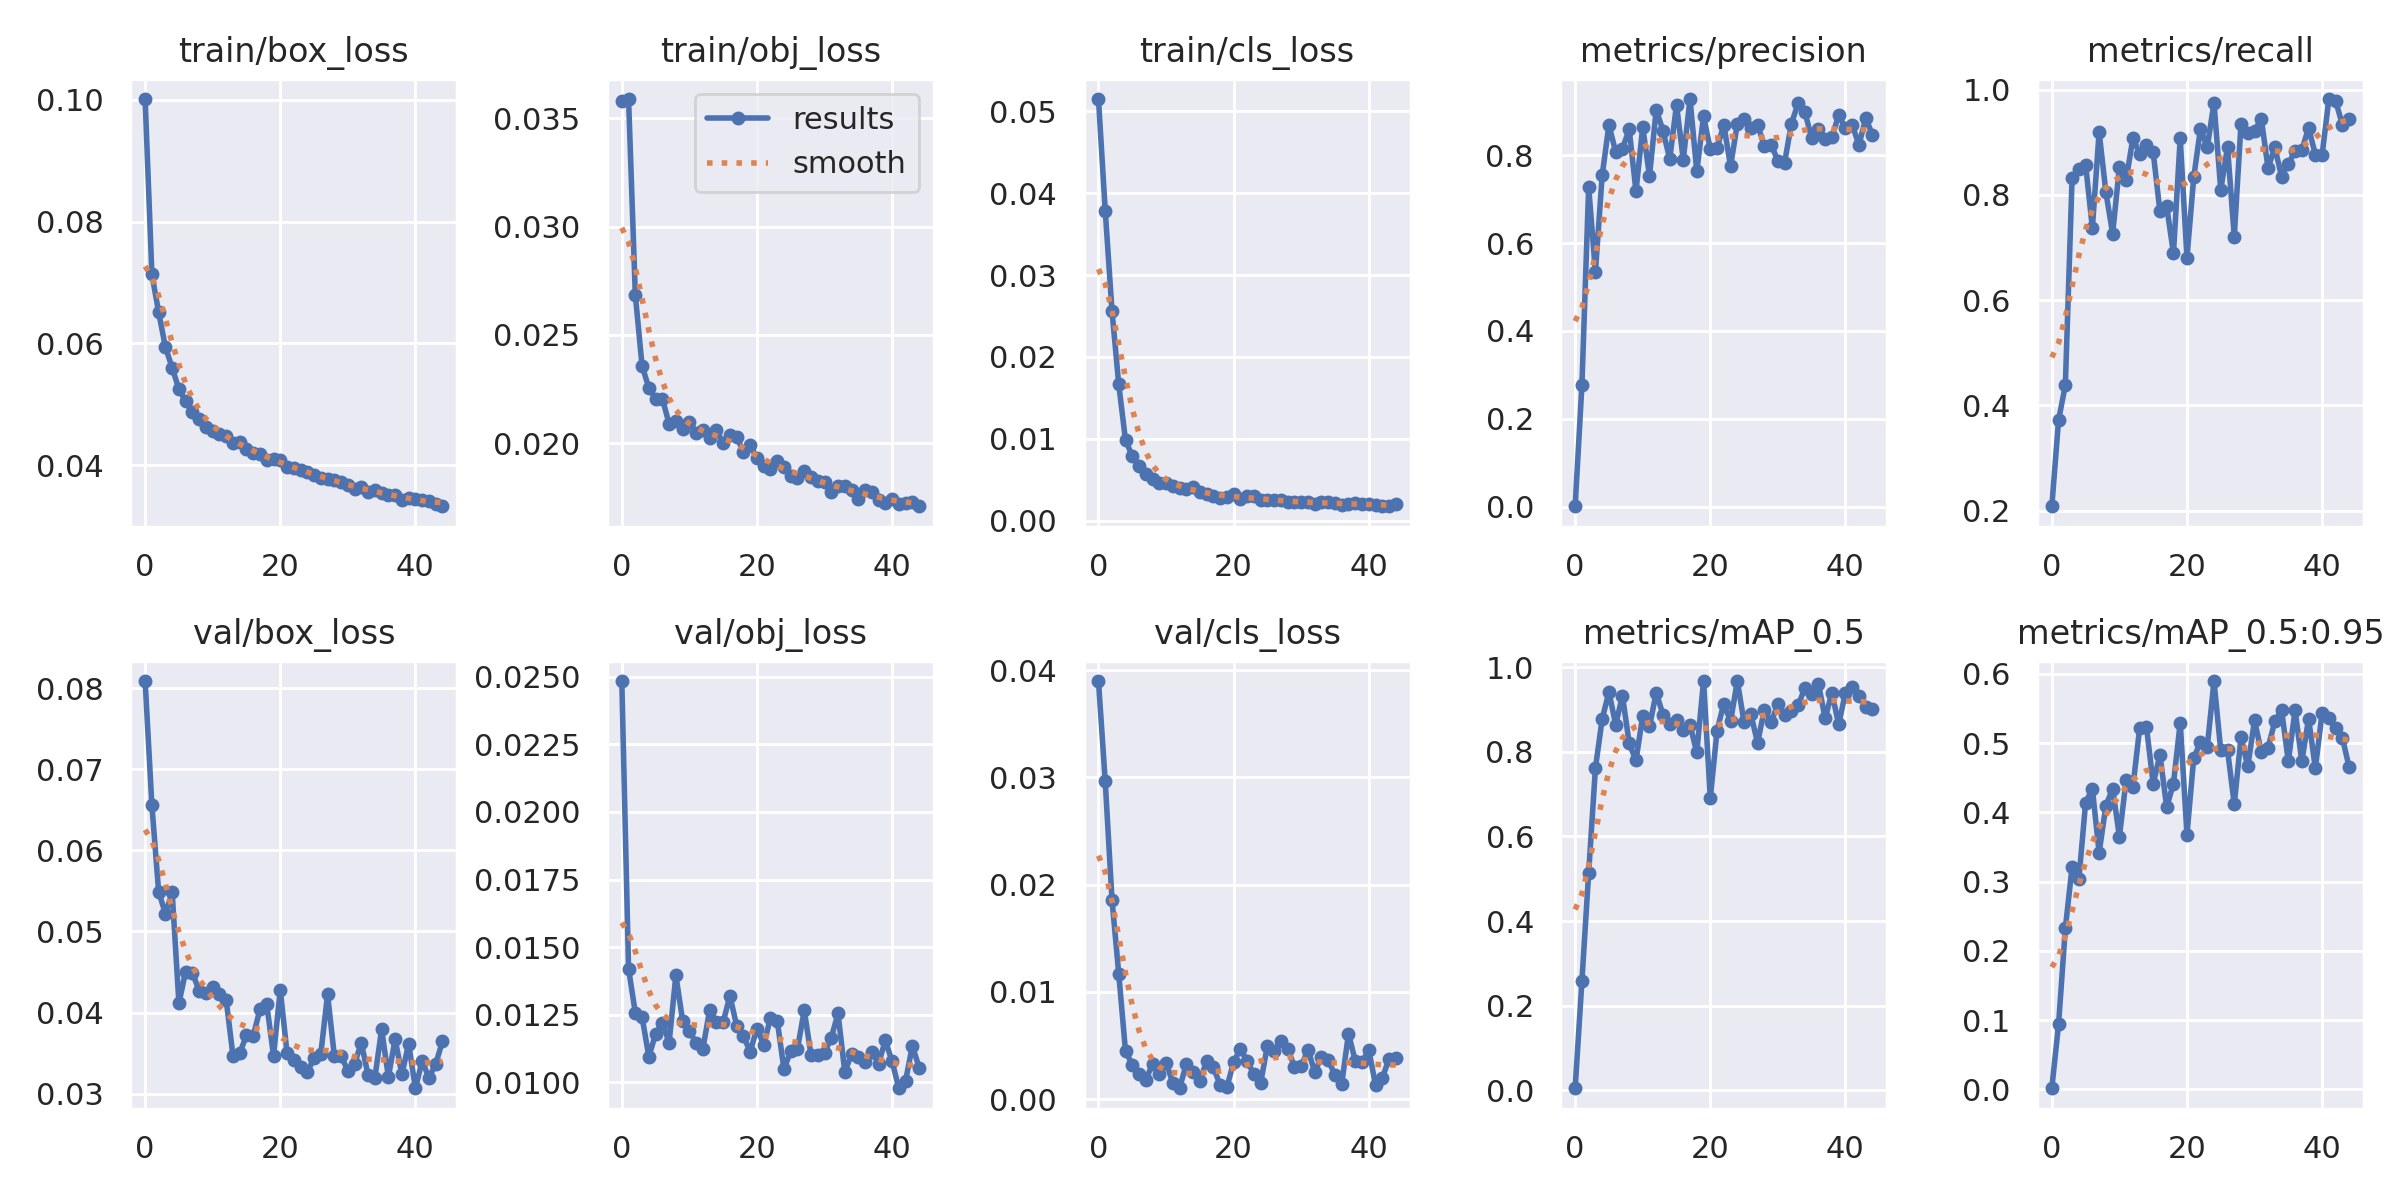

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/train/pcb_defect_yolov5s/results.png'))


In [ ]:
!ls runs/train/pcb_defect_yolov5s


confusion_matrix.png				     R_curve.png
events.out.tfevents.1766237667.4abfd578a9b5.12253.0  results.csv
F1_curve.png					     results.png
hyp.yaml					     train_batch0.jpg
labels_correlogram.jpg				     train_batch1.jpg
labels.jpg					     train_batch2.jpg
opt.yaml					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


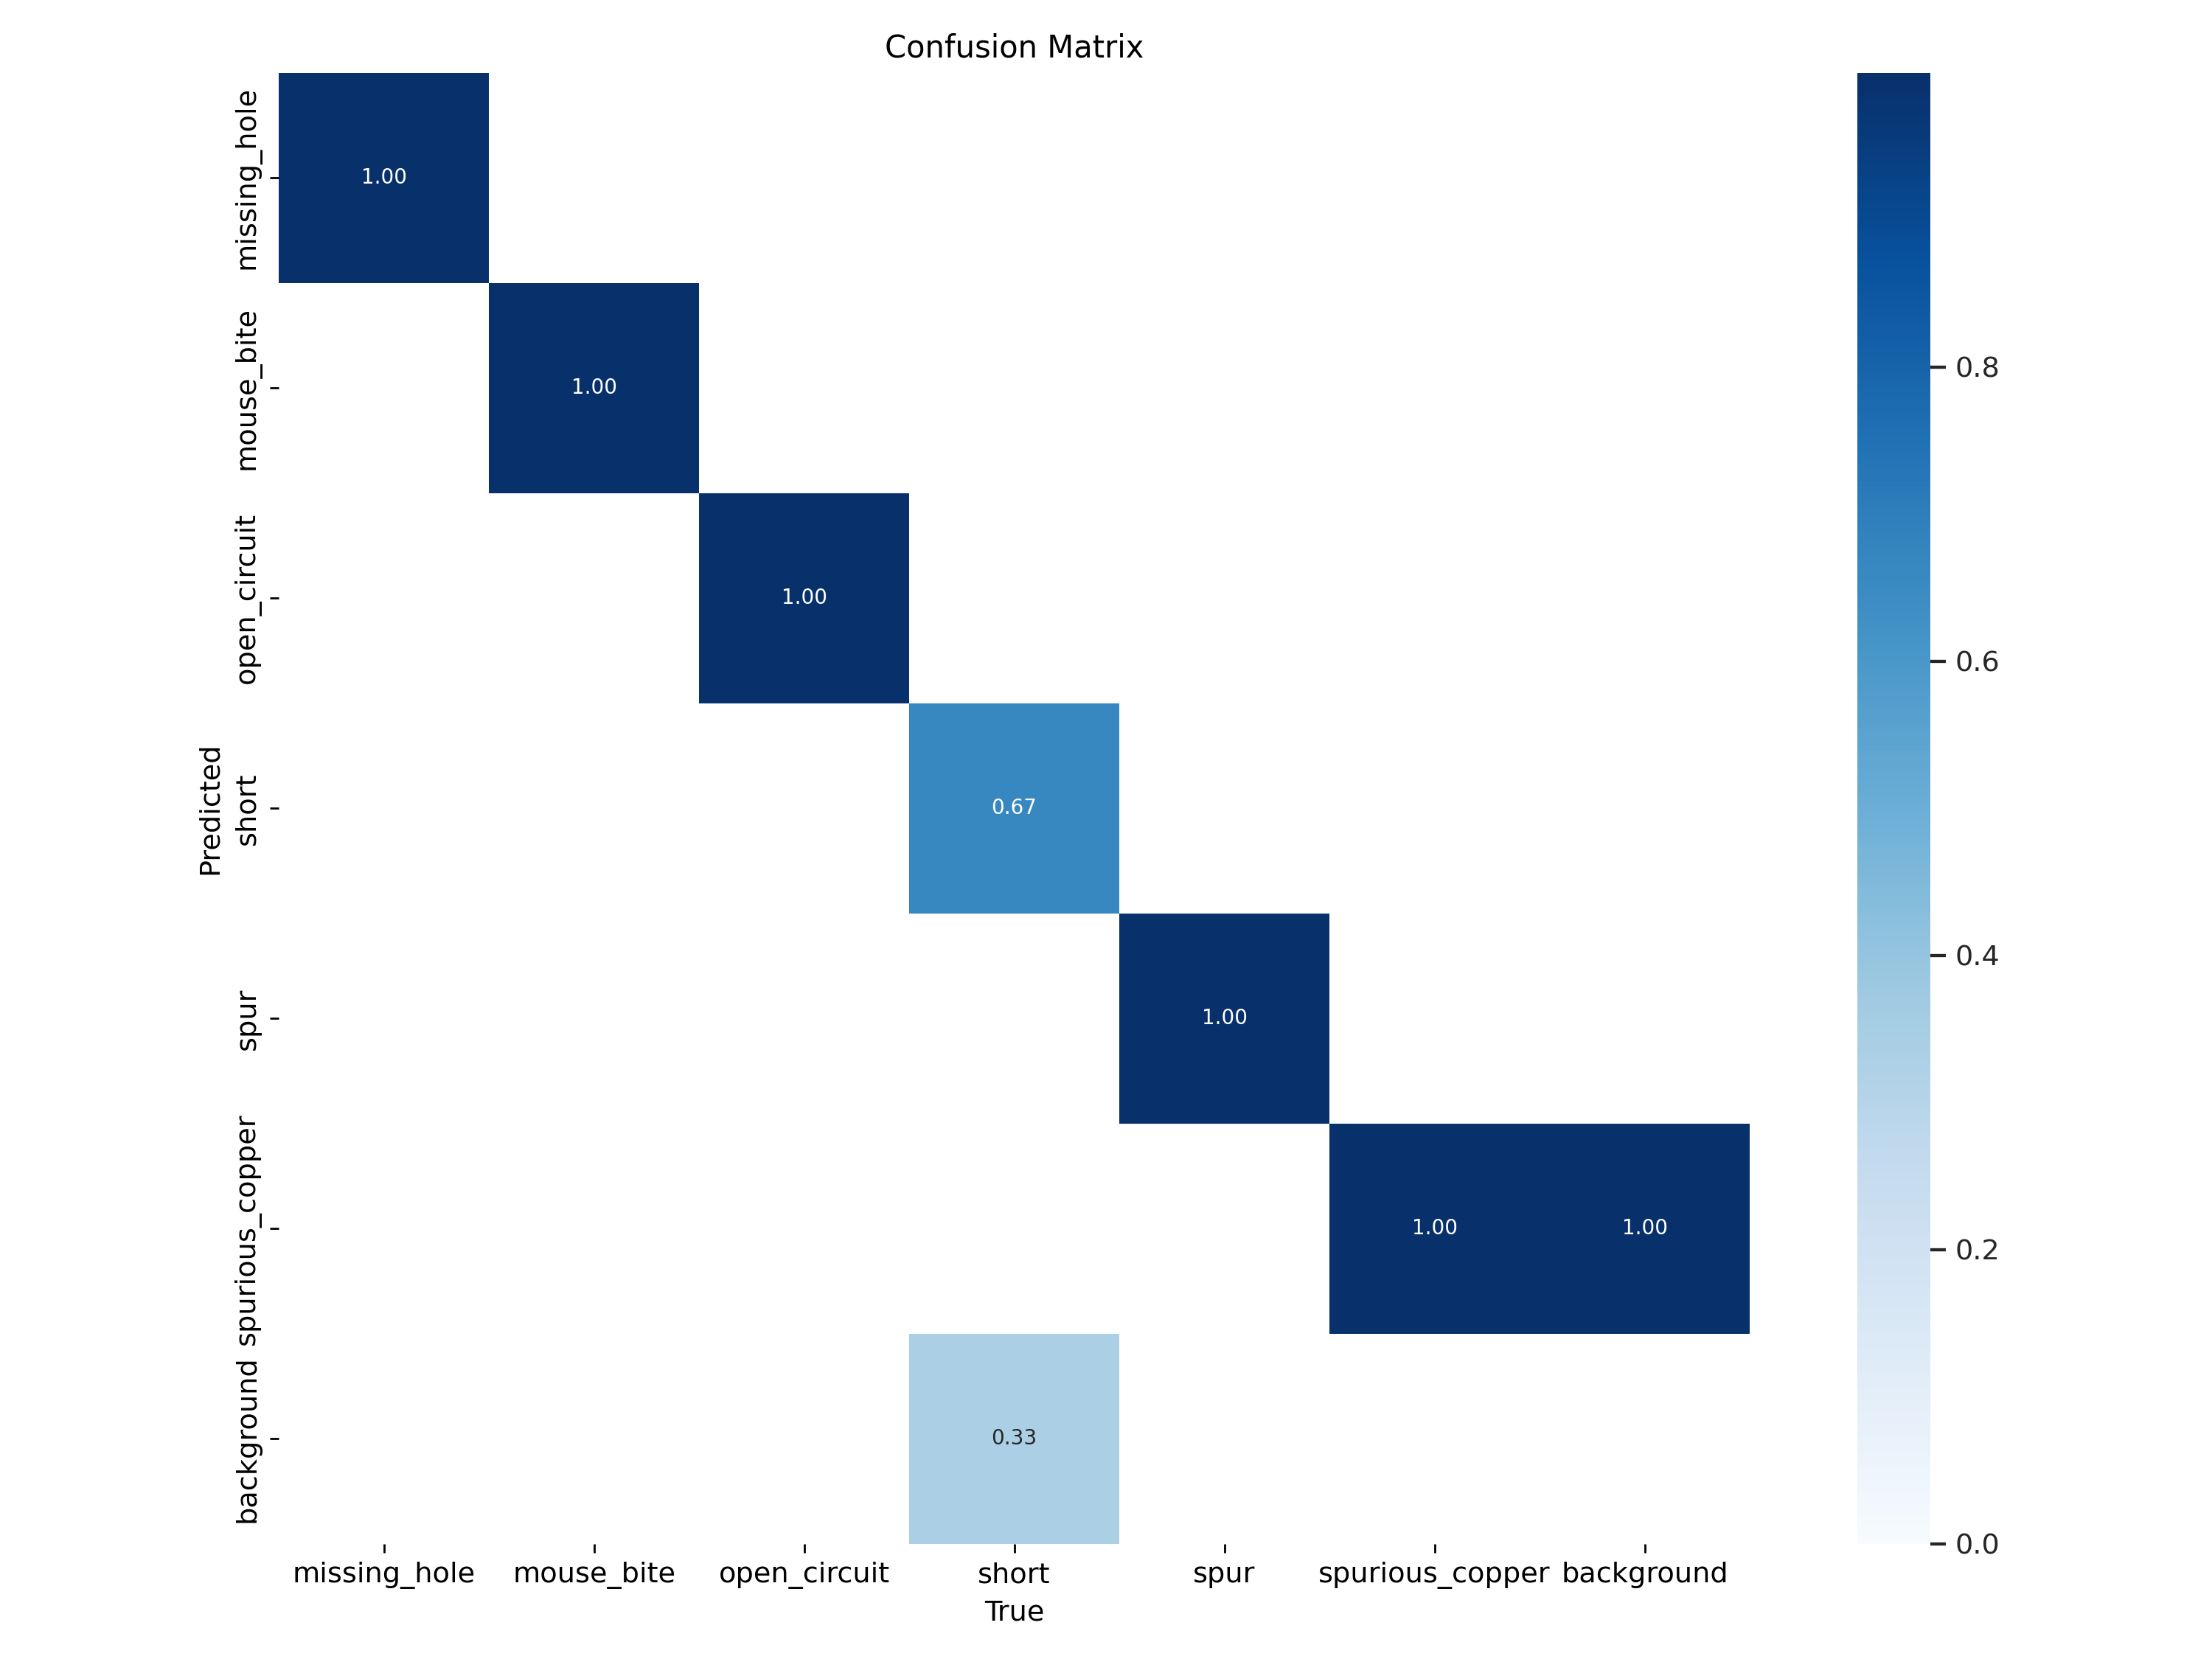

In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/train/pcb_defect_yolov5s/confusion_matrix.png'))


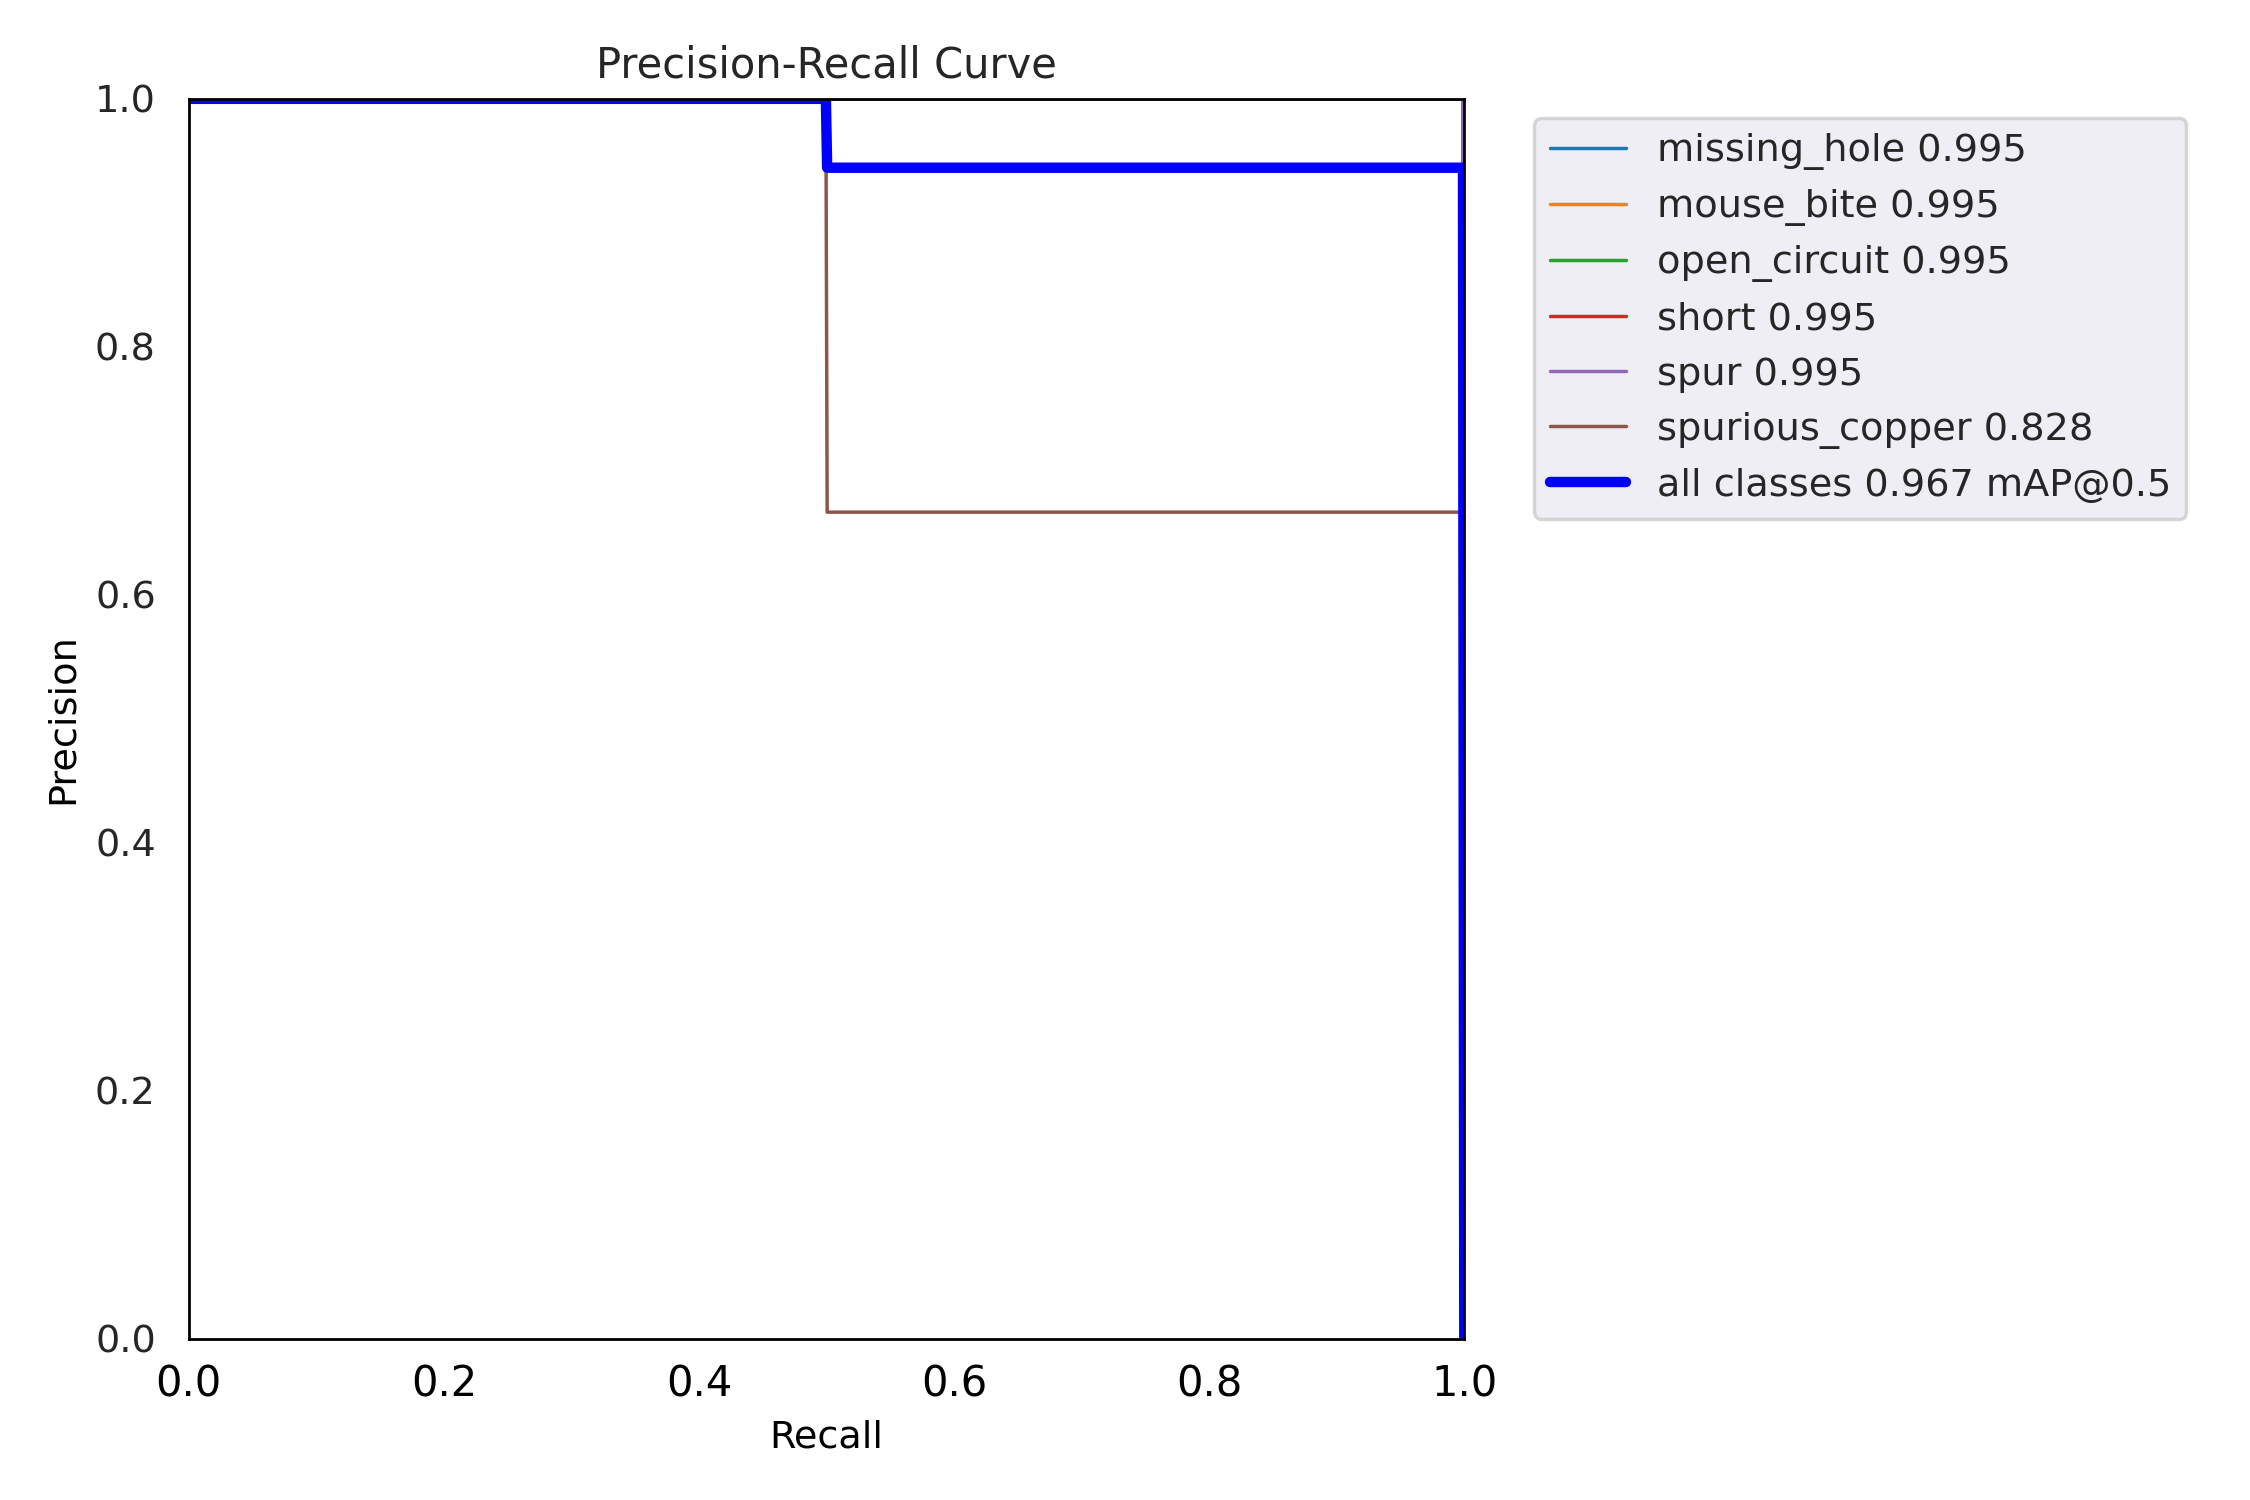

In [ ]:
display(Image(filename='runs/train/pcb_defect_yolov5s/PR_curve.png'))


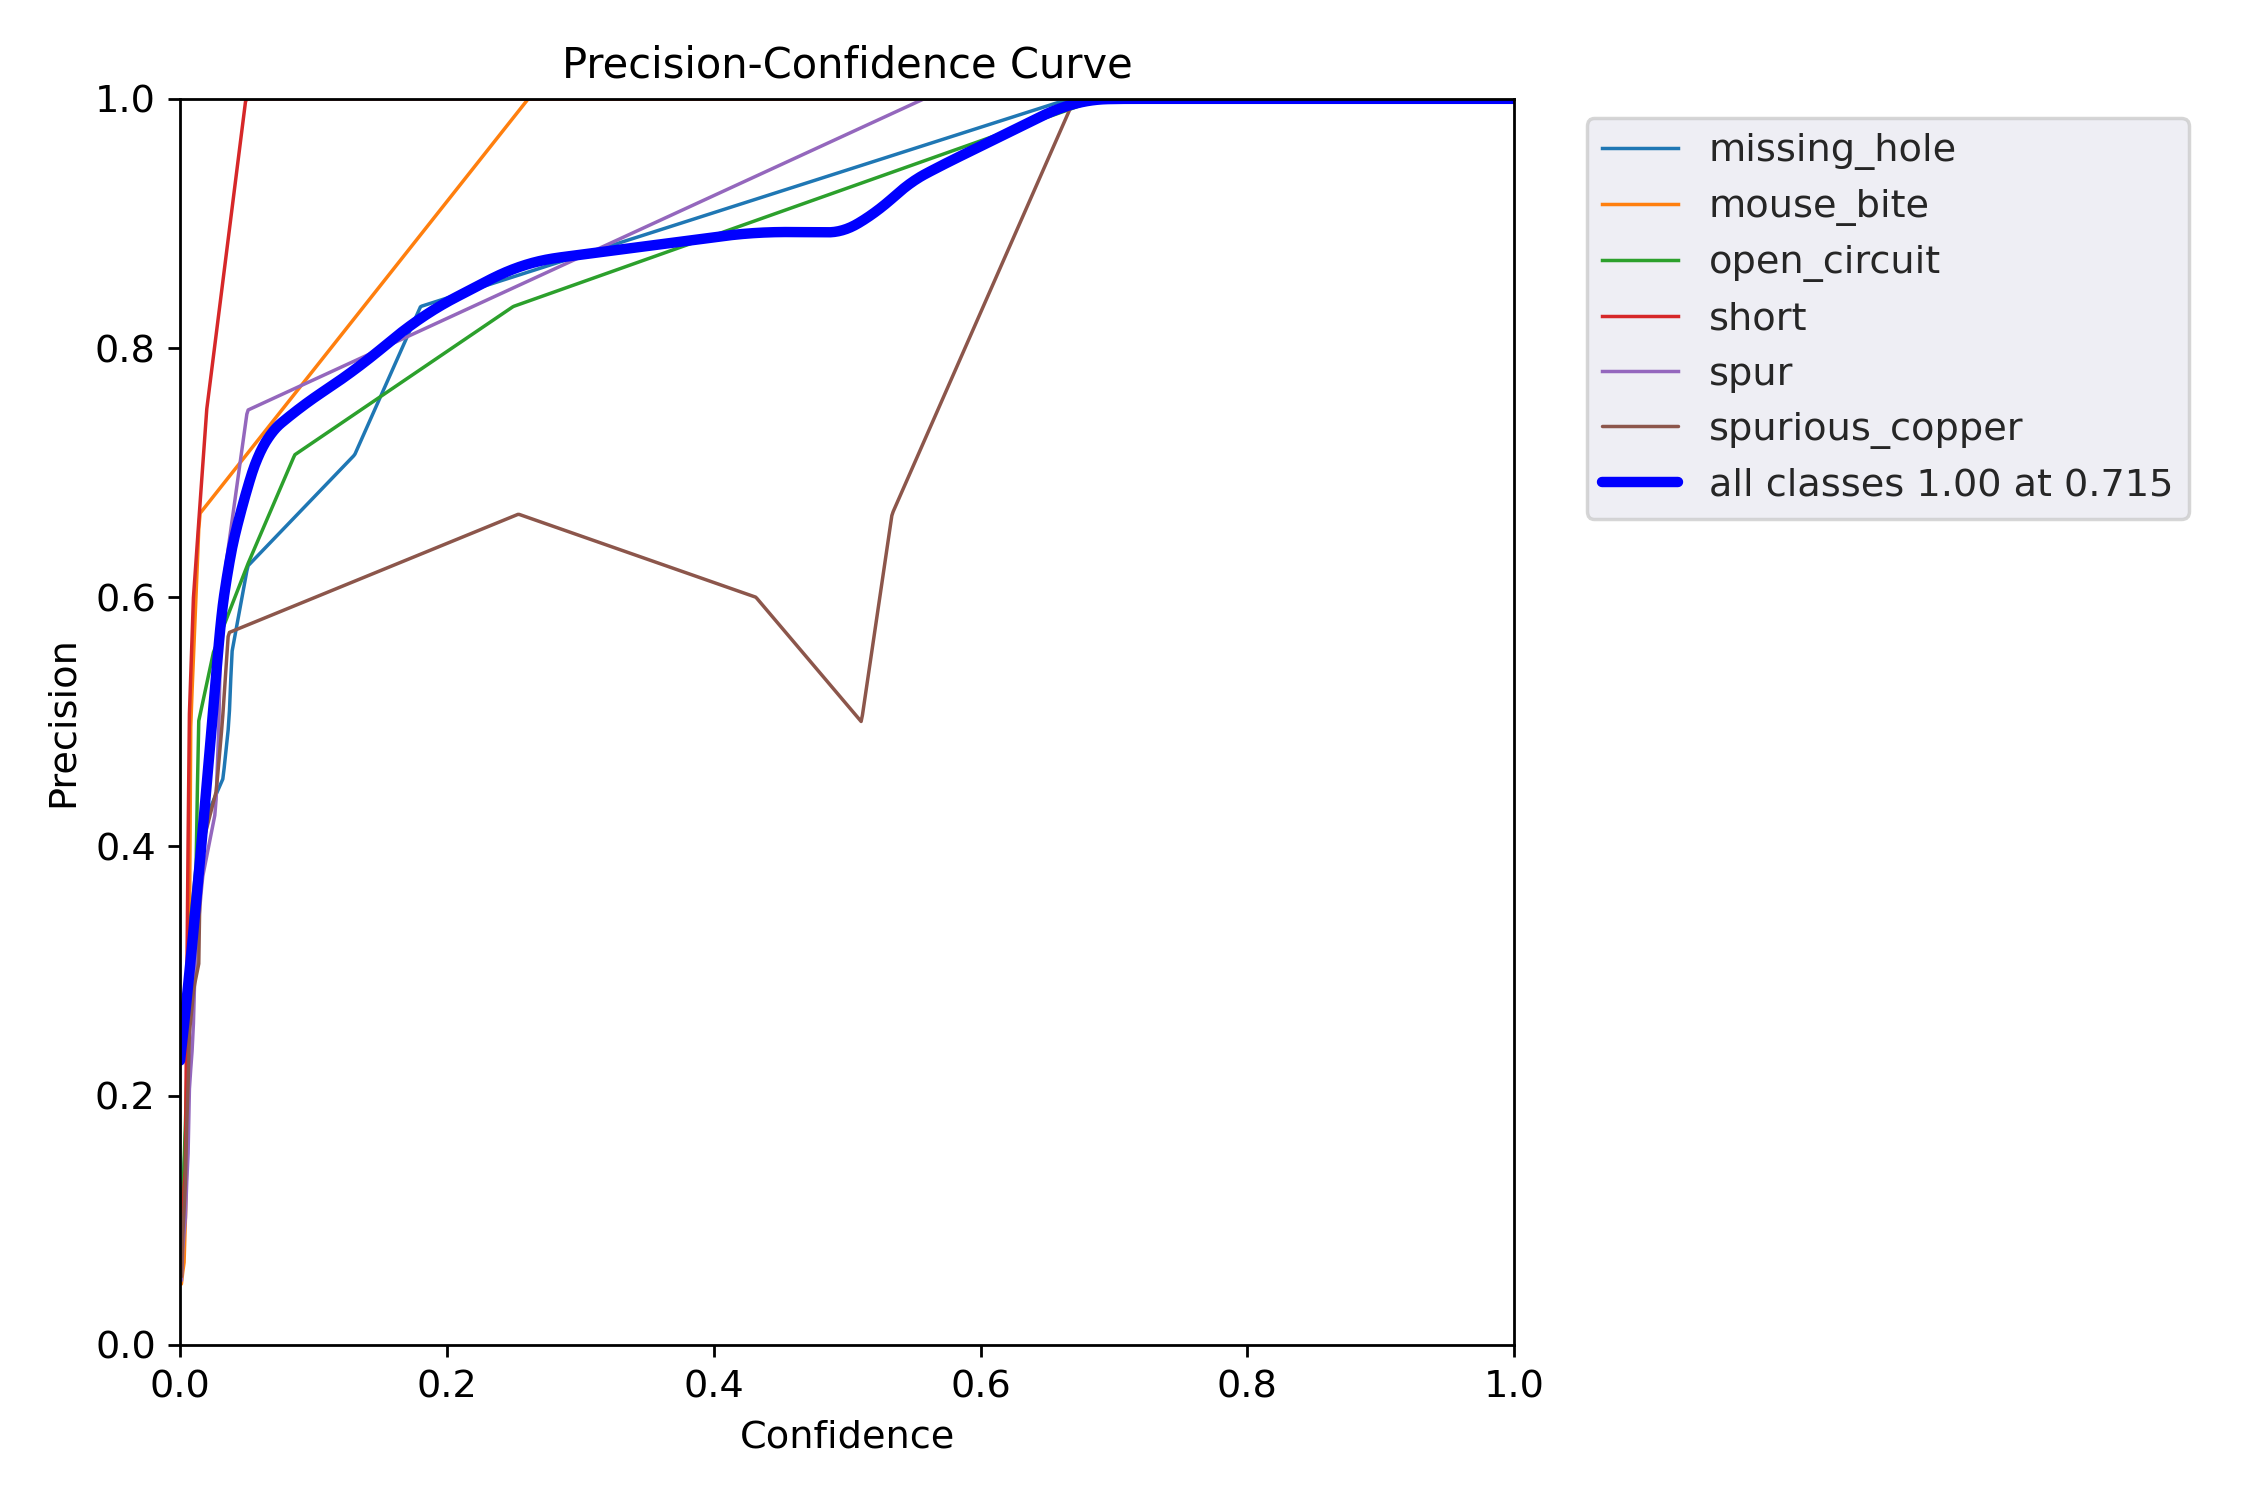

In [ ]:
display(Image(filename='runs/train/pcb_defect_yolov5s/P_curve.png'))


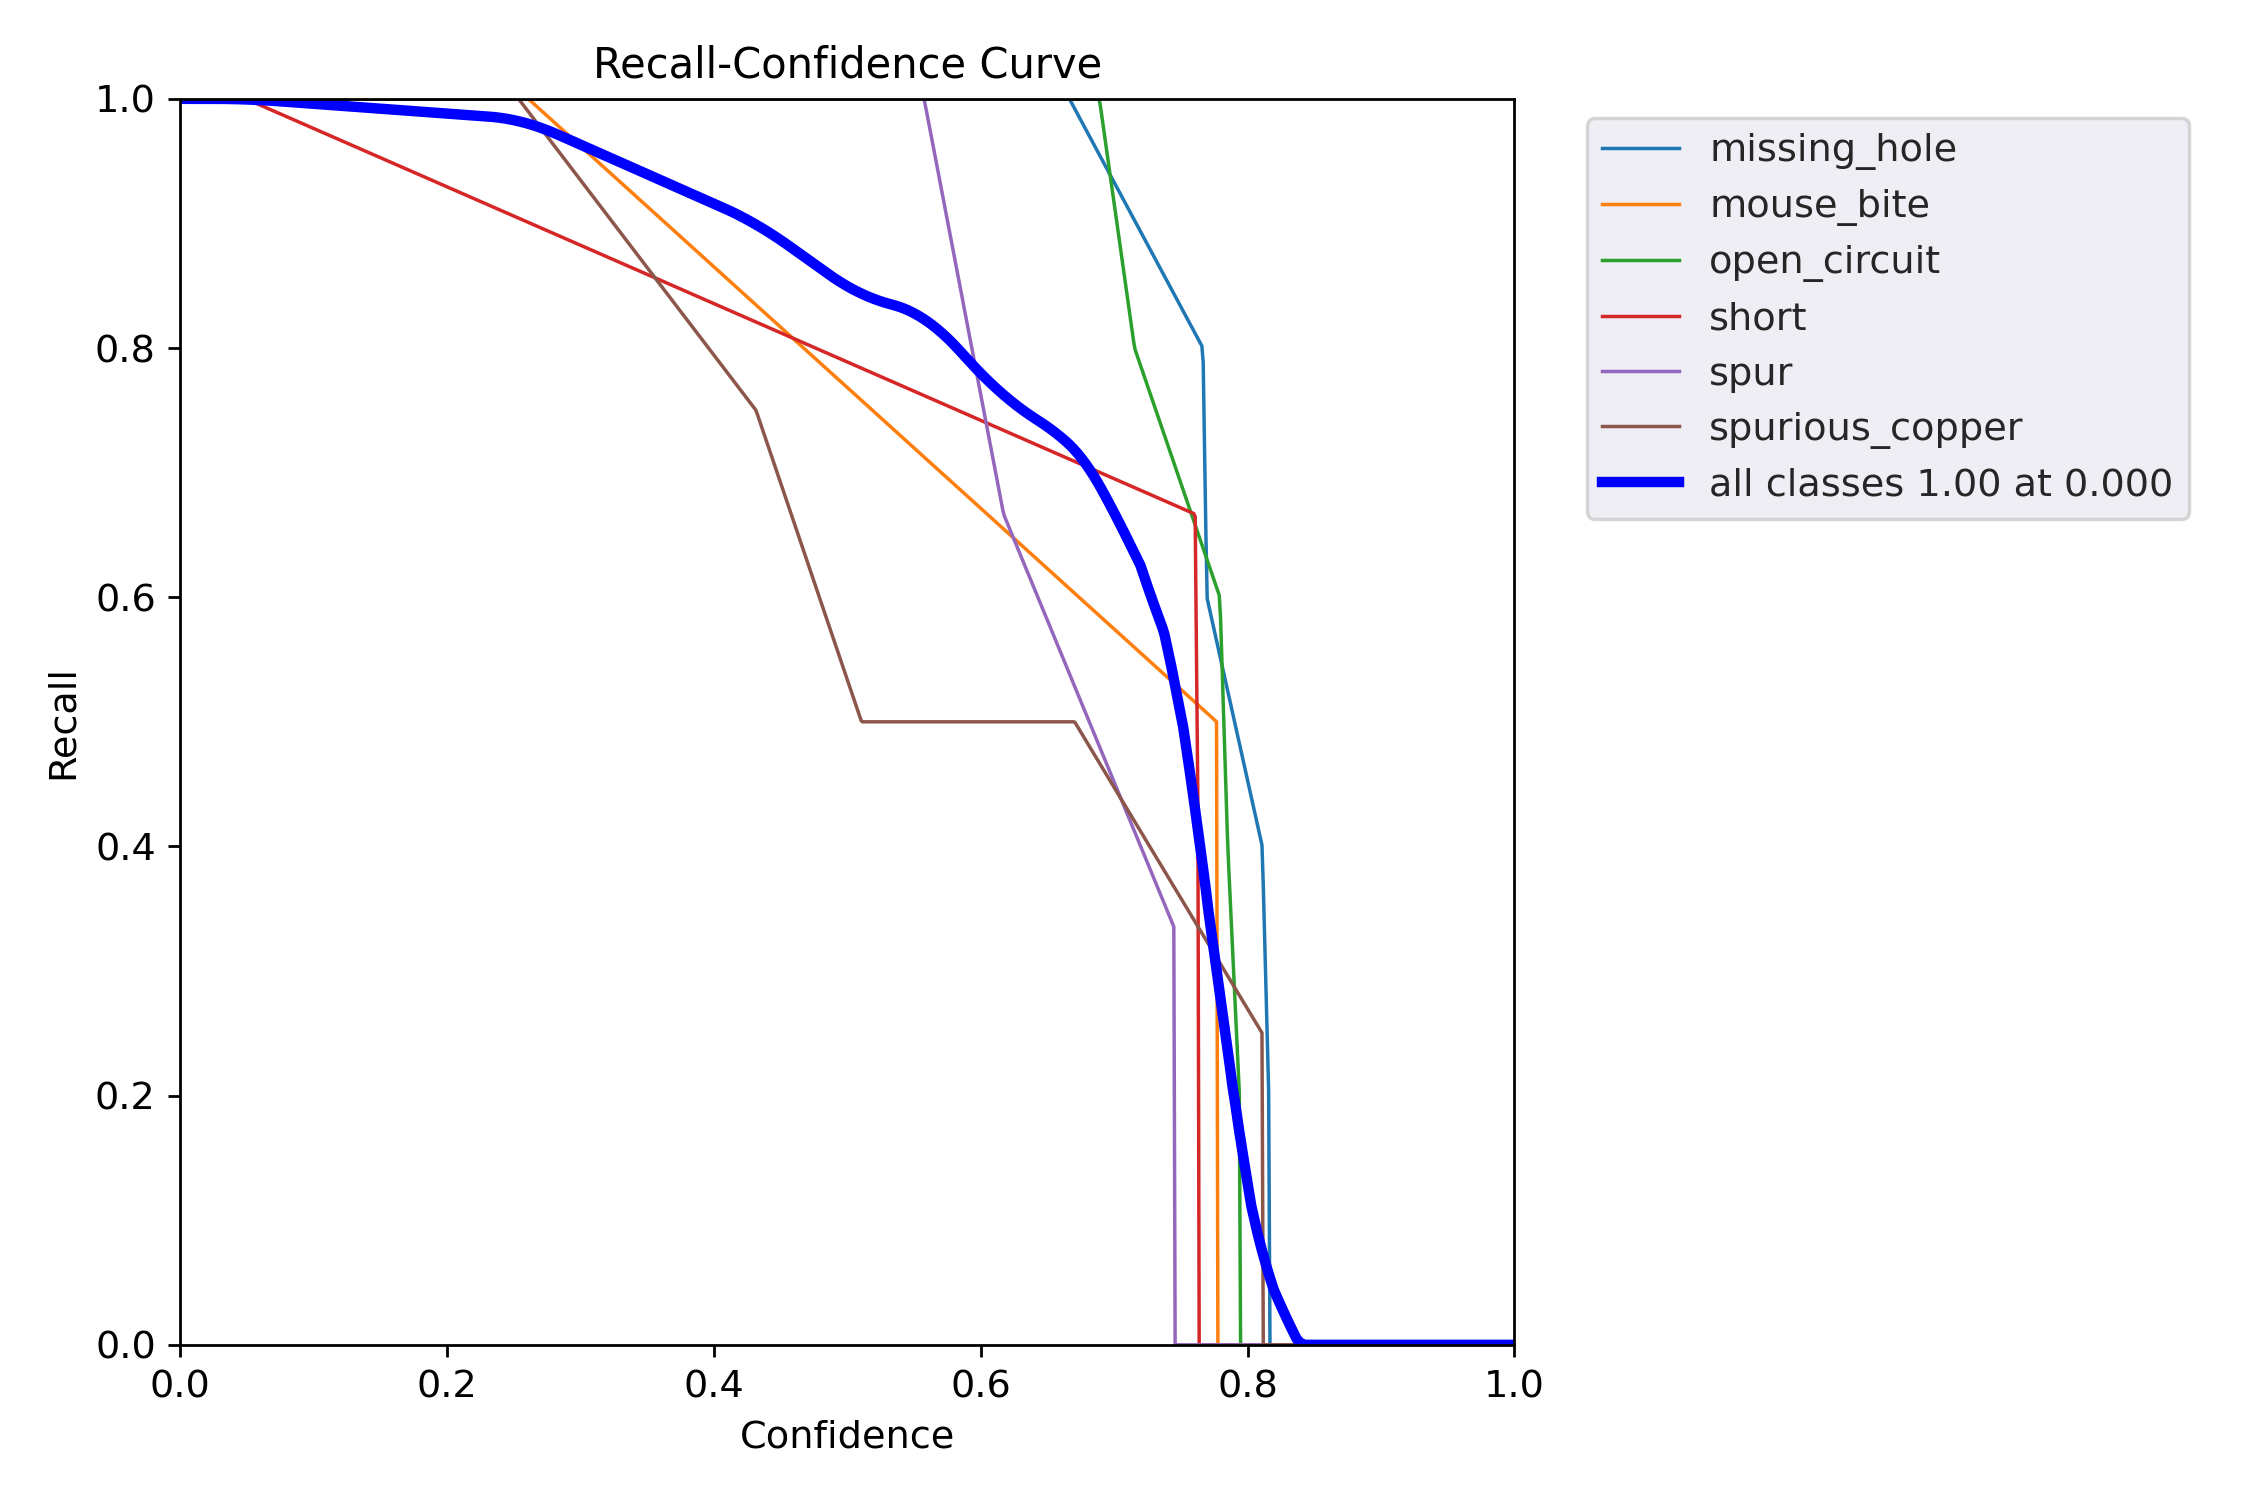

In [ ]:
display(Image(filename='runs/train/pcb_defect_yolov5s/R_curve.png'))


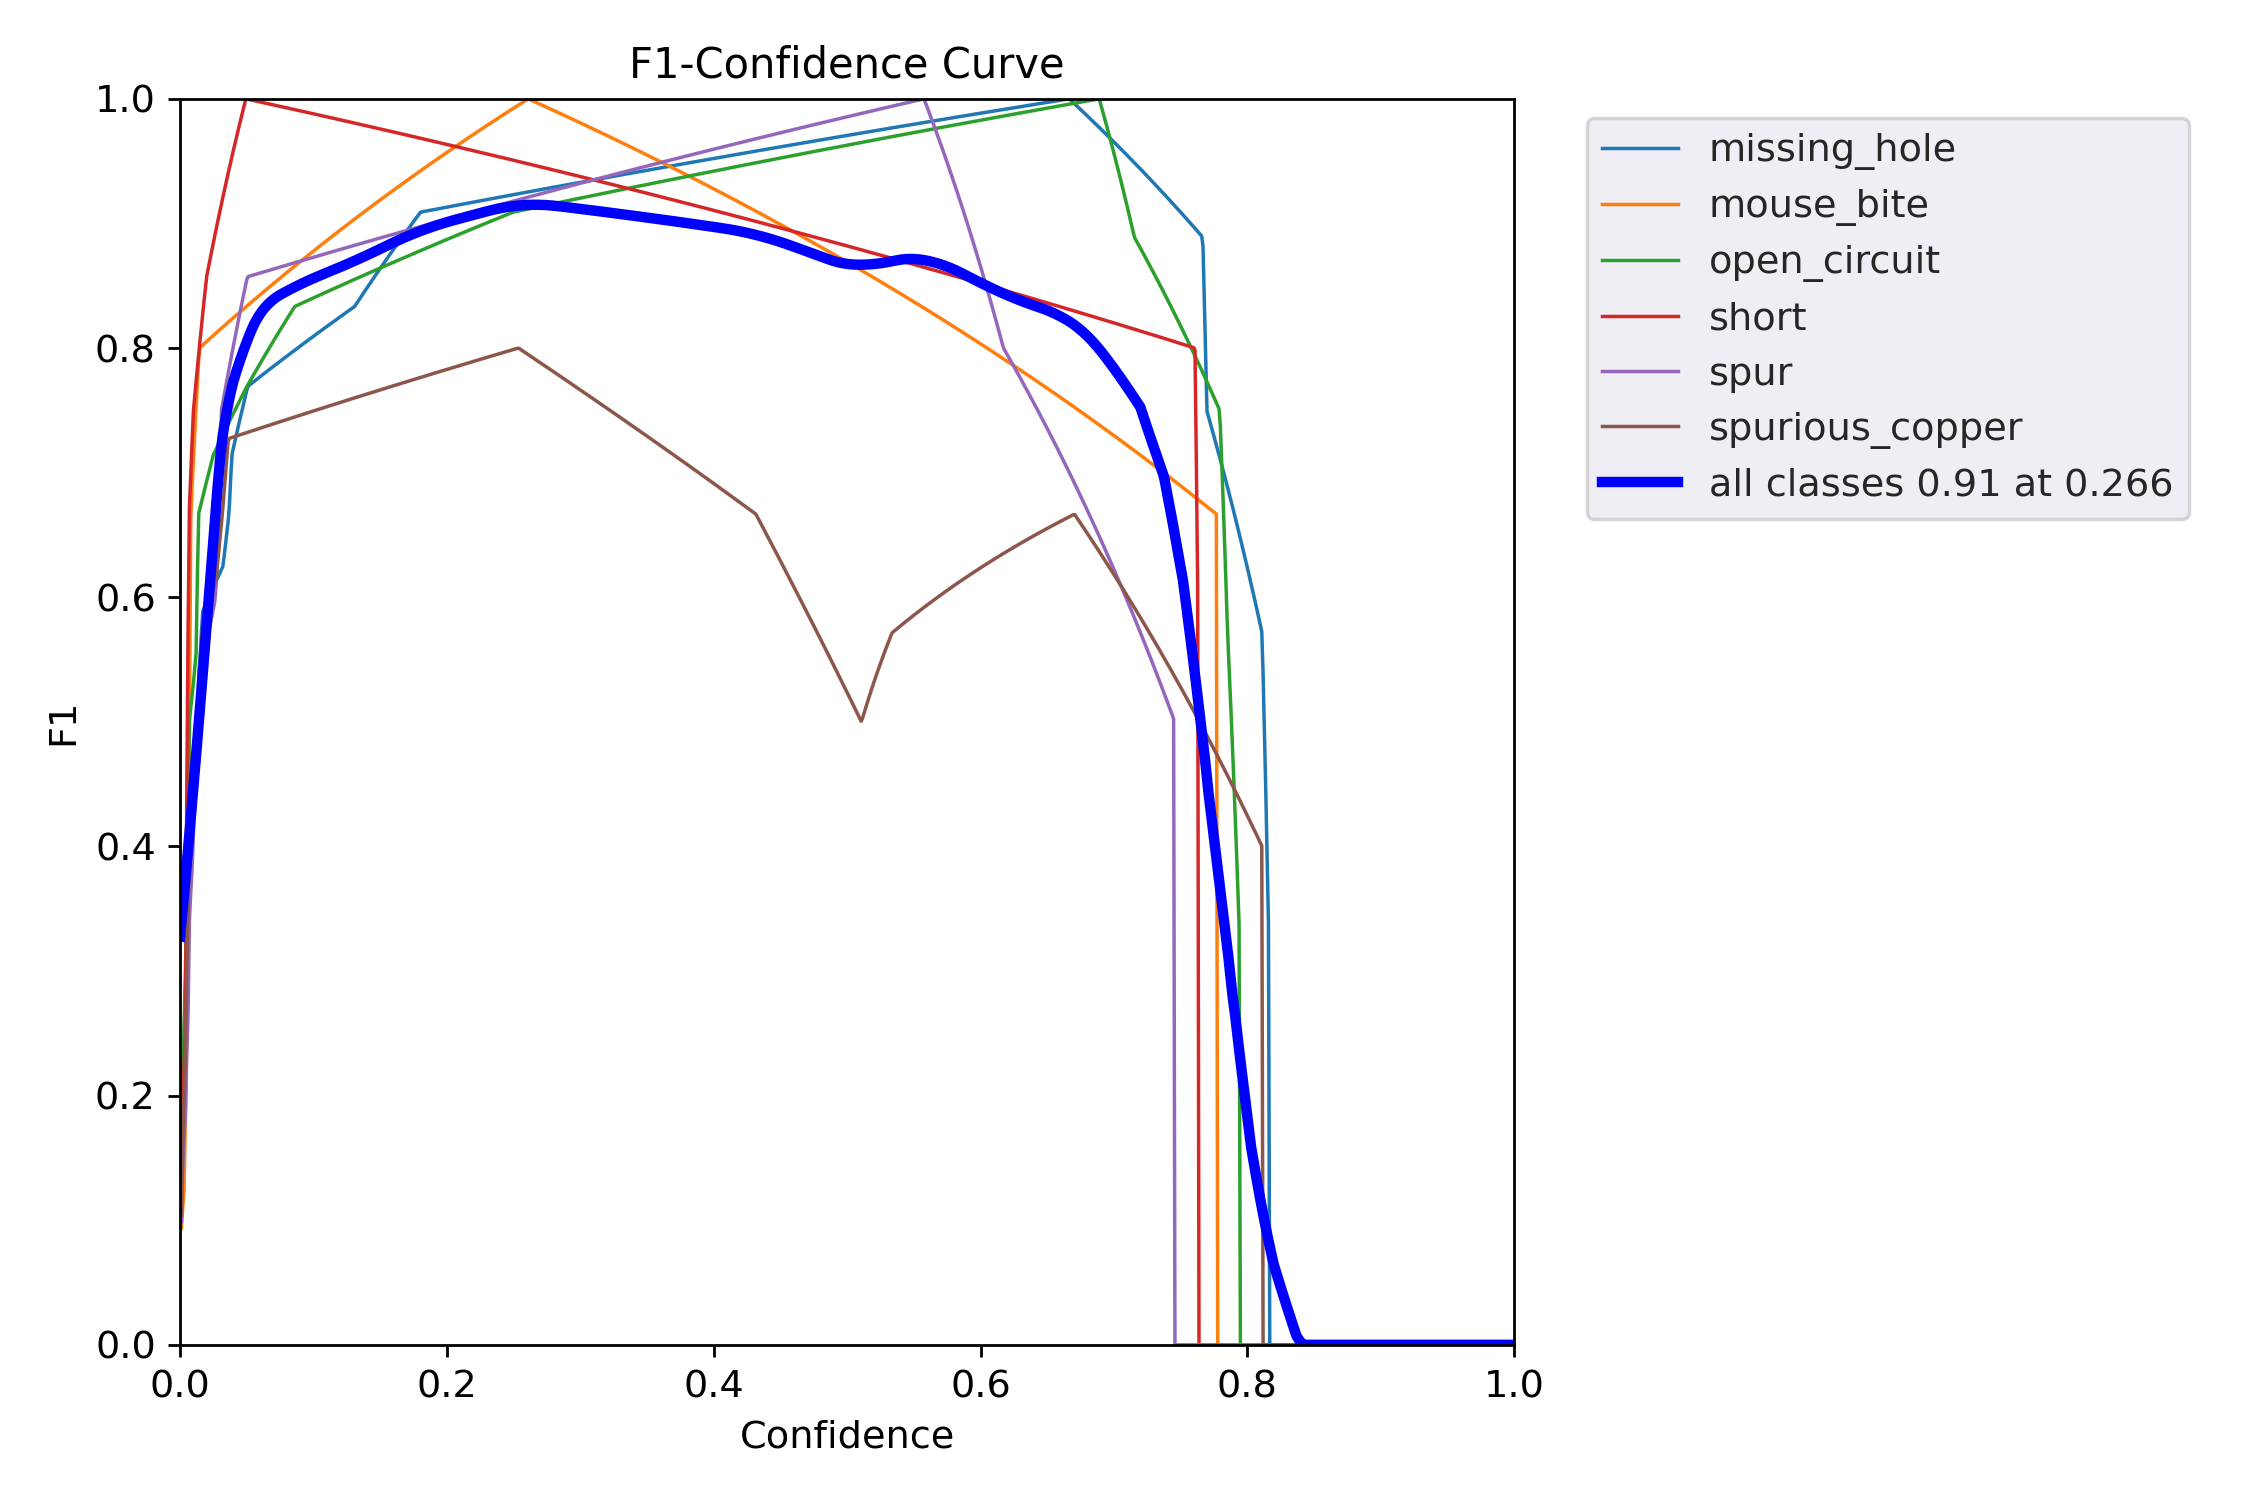

In [ ]:
display(Image(filename='runs/train/pcb_defect_yolov5s/F1_curve.png'))


In [ ]:
!zip -r pcb_defect_yolov5s_results.zip runs/train/pcb_defect_yolov5s


  adding: runs/train/pcb_defect_yolov5s/ (stored 0%)
  adding: runs/train/pcb_defect_yolov5s/hyp.yaml (deflated 45%)
  adding: runs/train/pcb_defect_yolov5s/F1_curve.png (deflated 6%)
  adding: runs/train/pcb_defect_yolov5s/val_batch0_pred.jpg (deflated 10%)
  adding: runs/train/pcb_defect_yolov5s/train_batch1.jpg (deflated 3%)
  adding: runs/train/pcb_defect_yolov5s/PR_curve.png (deflated 18%)
  adding: runs/train/pcb_defect_yolov5s/results.png (deflated 7%)
  adding: runs/train/pcb_defect_yolov5s/val_batch0_labels.jpg (deflated 11%)
  adding: runs/train/pcb_defect_yolov5s/weights/ (stored 0%)
  adding: runs/train/pcb_defect_yolov5s/weights/best.pt (deflated 9%)
  adding: runs/train/pcb_defect_yolov5s/weights/last.pt (deflated 9%)
  adding: runs/train/pcb_defect_yolov5s/train_batch0.jpg (deflated 3%)
  adding: runs/train/pcb_defect_yolov5s/labels_correlogram.jpg (deflated 34%)
  adding: runs/train/pcb_defect_yolov5s/R_curve.png (deflated 10%)
  adding: runs/train/pcb_defect_yolov5s/re

In [ ]:
from google.colab import files
files.download("pcb_defect_yolov5s_results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>